# Topic 2 : Models


## Section 1 : Absolute Value Functions

### Part 1: Use NumPy and Matplotlib to Plot the Absolute Value Function

#### Overview of Absolute Value Functions

An absolute value refers to how far a number is from the origin (0 on the number line). An absolute value is always positive, and can be used to measure both positive and negative numbers. For example, the distance of both 5 and -5 from 0 is 5, hence 5 is the absolute value for both. Absolute values are represented by the modulus symbol,  "||", with the values between it. For example, the absolute value of 5 is represented as |5|.

An absolute value function is a function that contains of a variable within absolute value bars; it is commonly used to measure the distance between points. It is considered a piecewise function, i.e. consisting of two linear functions, and creates a right angle at the origin.

The general form of the absolute value function is $f(x) = a |x - h| + k$, where a represents how far the graph stretches vertically, while h and k represents how far the funtion shifts horizontally and vertically. The most commonly used form of the function is $f(x) = |x|$, where a = 1 and k = h = 0. 

The code in this notebook uses NumPy and Matplotlib to plot both forms of the absolute value function.

#### Absolute Value :  Basic Form

The below code plots the absolute values of both 25 and -25. When a value is negative, the plot will open up below the origin and when it is positive, it will open above it.

In [1]:
## import libraries
import matplotlib.pyplot as plt
import numpy as np

The pos_neg() function will plot both absolute value functions for both the positive and negative form of a given integer(n).

The numpy abs() method is use to get the absolute value of the integer. Note that this value is converted to a negative to plot the absolute value function for the negative integer; this is so the function will open below 0 on the x axis.

In [4]:
def pos_neg(n):

        # Labels for plots
        label1 ="f(x) = |{}|".format(str(n))
        label2 = "f(x) = |-{}|".format(str(n))

        #Plot negative abs value function first - range -n to n + 1
        x = np.arange(-n, n+1)
        fig,ax = plt.subplots(figsize = (12,6))

        #Make absolute value negative again - so graph opens under origin
        y = -(np.abs(x))
        ax.plot(x, y, label = label2)


        y = (np.abs(x))

        # Move origin into centre - make right angles easer to see
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.plot(x, y, label = label1)
        ax.set_title("Positive and Negative Value Functions for Integer {}".format(n))
        plt.legend()
        plt.show() 
        plt.close()

Below, the absolute values for 25 and -25 are plotted using this function.

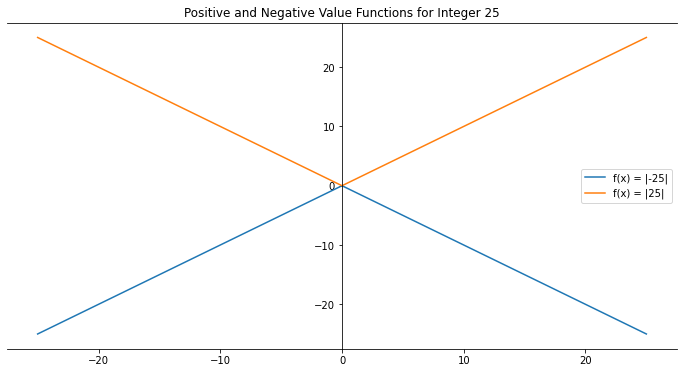

In [5]:
pos_neg(25)

#### Absolute Value : General Form

The below function generates an absolute value plot for a given function. It takes 5 parameters:
- n : Corresponds to x in the general form of the absolute value function
- h : Horizontal shift for plot
- k : Vertical shift for plot
- a : Vertical stretch, how far the plot stretches upwards.

In [6]:
def plot_abs_value(n, h, k, a, pos = True):
    #Generate x values ranging from - x to x
    x = np.arange(-n, n+1)

    #If pos is set to true, plot should open above origin
    if pos == True:
        y = a * (abs(x - h) + k)
    else:
        y = -a * (abs(x - h) + k)
    
    return x,y

Next, this method is called to plot the following absolut value functions:
- $f(x) = 3|2 - 0| + 0$
- $f(x) = 1|2 - 0| + 0$

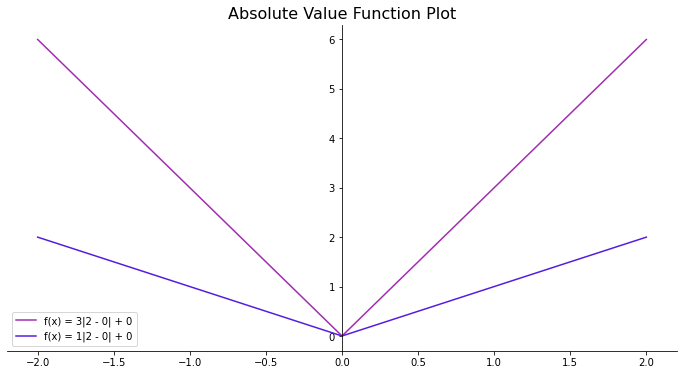

In [30]:
x, y = plot_abs_value(2, 0, 0, 3, pos = True)
x2,y2 = plot_abs_value(2, 0, 0, 1, pos = True)

fig, ax = plt.subplots(figsize = (12,6))
line1 = ax.plot(x,y, label = "f(x) = 3|2 - 0| + 0", color = "#a12cb0")
line2 = ax.plot(x2,y2, label = "f(x) = 1|2 - 0| + 0", color = "#541dde")

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title("Absolute Value Function Plot", fontsize = 16)
ax.legend()
plt.show()

### Issues with Using Absolute Values to Fit Data

When modelling the relationship between two variables, a common method is to find a line that is closest to the datapoints, i.e. minimizes the difference between itself and the observed data. 

If we used absolute values to find this difference, the steps would be as follows:
- Get the predicted line equation ($Y = b_0 + b_1X_i$)
- Get the coordinates of each observed data point ($ X_i,Y_i$)
- Get the error for each coordinate, i.e. the distance from the point to the line ($Y_i - (b_0 + b_1X_i) = Y_i - b_0  - b_1X$)
- Take the sum of these distances for all datapoints. The line with the lowest overall value best describes the relationship between our two variables.

Generally, when dealing with distances between data points and lines, some will be above the line and others will be below,as seen in the below plot. This means that we will have both positive and negative error values for our data points.

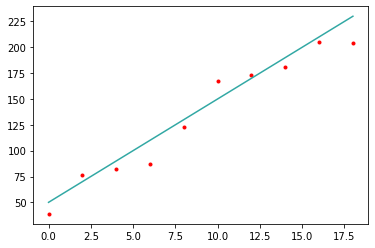

In [18]:
n = np.arange(0.0,20,2)
d = 50 + (n * 10) + np.random.normal(0,10,n.size)
y = 50 + (n * 10)
plt.plot(n,d, "r.")
plt.plot(n,y, color = "#32a8a4")
plt.show()

Positive and negative values may cancel each other out when added together, which will not give us an accurate representation of the total error. If we used absolute values to represent the distance between the line and datapoints, this would resolve this issue; as mentioned in the previous section, absolute values are always positive.

However, absolute values are generally not used to fit data to straight lines due to the mathematical difficulties caused by working with them. When using absolute values to calculate the best fit, our formula looks like the below, and returns an overall error value for the line.

$\sum_{i=1}^n|Y_i - b_0 - b_1X_i|$

We need to find the line that minimizes the formula, i.e. returns the smallest possible error value. Caclulus can be used to maximise or minimuze a formula, with a process called differentiation. Differentiation is a proces of finding the derivative, or rate of change of a function, based on one of its variables. The derivative gives us the slope of the line tangent to the function, i.e. touching the curve at a given point on the graph. This can then be used to find the equation of the tangent line.

Minimizing a formula using differentiation involves taking the first derivative and setting it to 0. As mentioned above, the derivative is the slope of the tangent line. The slope, or limit, exists and is a unique value if there is only one tangent line. However, in the case of absolute value functions, there is no one tangent at 0. In the previous section where absolute values were plotted, the function touches the x axis twice. Hence, absolute values are not differentiable at 0 and we cannot minimize the formula using the method described above. If we were to use absolute values to minimize the formula, we would need to draw and measure regression lines for each data point and sum values, which is not feasible. 

Therefore, another method of making all the error values positive is required. Instead of using the absolute values, the sum of the squared errors can be used to minimize the function; as the square of a number is always positive, this eliminates negative values, and by minimizing this value we can find the line that best fits the data points - this process is known as Least Squares Fitting.

## Part 2: Fit a Straight Line to a Data Set

### Section 1: Use NumPy and SciPy Optimize to Fit Data
In this section of the notebook, three methods of fitting a straight line to a data set are used and the results are plotted.

These methods are as follows:
 - NumPy Polyfit : Uses Least Squares Fitting to calculate the line of best fit for the data.
 - SciPy Optimize : Given a function and an initial guess for the m and c parameters, SciPy Optimize returns the m and c values for the funciton that will result in the least cost.
 - SciPy Curve Fit : Uses Non-Linear Least Squares Fitting to fit a curve to a data set.

#### Method 1: SciPy Optimize

To use this method, the SciPy Optimize package must first be imported. The NumPy package, which has already been imported, is required to convert the data to arrays that can be passed to the Optimize function.

In [23]:
import scipy.optimize as so

Next, the two sets of variables, x and y, are converted to NumPy arrays.

In [20]:
#Variables for which optimized function is required.
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

x = np.array(x)
y = np.array(y)

From the SciPy Optimize package, the Minimize function is used. This returns the minimized cost value for a given function. It takes the following parameters:
- fun: The function to be minimized. In this case, this is the cost function for our x and y values. Note that the function takes a single argument, and the cost function takes two arguments, m and c. Therefore, we define a function that takes a list containing both m and c as an argument, and calculates the cost for these values. This function can then be passed to the Optimize method to be minimized.
- $X_0$: An ndarray containing the initial guesses for m and c. 

The Minimize function will return two values, m_o and c_o, which represent the optimized m and c values for our cost function, i.e. the slope and intercept for the closest fit line to our dataset.

Below the least cost function that will be passed as an argument to the Minimize function, is defined.

In [21]:
def cost(MC):
    #Unpack the M and C values - will be passed to Mimimize as an array
    m,c = MC
    
    #Minimized cost function - x and y are measured values, m is the gradient of the line and c is the intercept or point 
    #At which the line crosses the y axis
    #M and c are the values to be optimized
    #For each value in the dataset, 
    #(m*x-c) is subtracted from y to give us the value that y should have been
    #These are summed and squared to give us the total cost for the line
    
    cost = np.sum((y-m*x-c) ** 2)
    return cost

Next, the cost function, along with our initial guesses for x and y, are passed to the Minimize function.

In [24]:
result = so.minimize(cost, (2.0, 2.0))

#Function returns optimized m and c values as an array, below code isolates each result to calculate the y values later
opt_m = result.x[0]
opt_c = result.x[1]

print(opt_m,opt_c)

0.10315785999003411 1.0494740589312146


The above values can be plugged into the standard line equation $y = mx + c$ to give us the optimized values for y.

Below, the original data along with our optimized values are plotted.

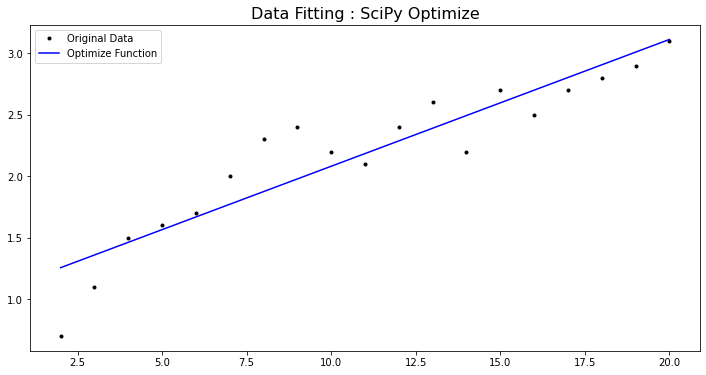

In [29]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x,y, 'k.', label = "Original Data")
ax.plot(x, opt_m * x + opt_c, 'b-', label = "Optimize Function");
ax.set_title("Data Fitting : SciPy Optimize", fontsize = 16)
ax.legend();

#### Method 2: NumPy Polyfit

***Note - the NumPy Polyfit function is covered in detail in the notebook for Topic 3 - Parameters***.

The numpy polyfit function fits a polynomial of degree deg to points x and y using Least Squares fitting. It returns a single-dimensional array of coefficients that minimize the squared error of the polynomial. It takes three arguments:
- x, y: Data points to be fitted to a polynomial
- deg: Number of degrees

In the below function, we are fitting a straight line to our datasets, hence a 1-degree polynomial (monomial) is required. The returned coefficients correspond to the optimized m and c values for the function.

In [42]:
#Get optimized m and c values
best_fit_poly = np.polyfit(x,y,1)
poly_m = best_fit_poly[0]
poly_c = best_fit_poly[1]

print(poly_m,poly_c)

0.10315789473684209 1.0494736842105261


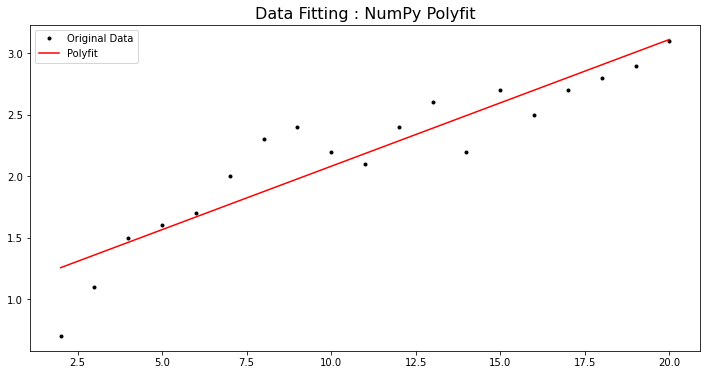

In [53]:
# Plotting resulting lines with original data
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x,y, 'k.', label = "Original Data")
ax.set_title("Data Fitting : NumPy Polyfit", fontsize = 16)
ax.plot(x, poly_m * x + poly_c, 'r-', label = "Polyfit")
plt.legend()
plt.show()

#### Method 3: SciPy Curve Fit

This function uses non-linear least squares to fit a function to a set of data points. It takes the following arguments:
- fun: The model function. The independent variable (x) must be the first parameter in this function, followed by the parameters to fit (i.e. m and c)
- xdata: Independent variables
- ydata: Dependent variables

As non-linear least squares is used to find the optimized value for the parameters, this function can be used to map data where a linear relationship does not exist between the dependent and independent variables.Instead of passing the standard line equation $(y = mx +c)$ as the model function, the model that best resembles the relationship between the data can instead be used (e.g. exponential, normal etc). However, in this case we will use the function to fit a straight line to the data points.

Below, the line function to be passed to the Curve Fit method is defined.

In [48]:
##Line function

def f(m,x,c):
    return m*x+c

Next, the curve_fit function is called, with the line function f and our x and y variables passed as arguments.

In [47]:
result = so.curve_fit(f,x,y)
print(result)

(array([0.10315789, 1.04947369]), array([[ 0.00010728, -0.00118012],
       [-0.00118012,  0.01619984]]))


Two arrays are returned as results; the first array corresponds to the m and c parameters required; we can see the values are almost identical to those returned by numpy polyfit and the minimize function.

In [49]:
curve_m, curve_c = result[0]
print(curve_m, curve_c)

0.10315789458399933 1.0494736859688867


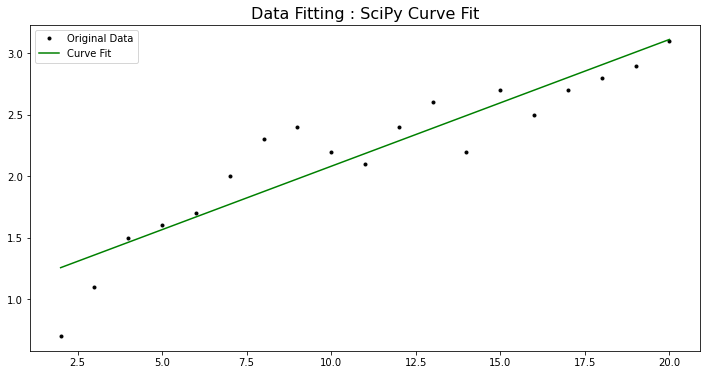

In [52]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x,y, 'k.', label = "Original Data")
ax.plot(x, curve_m * x + curve_c, 'g-', label = "Curve Fit")
ax.set_title("Data Fitting : SciPy Curve Fit", fontsize = 16)
plt.legend()
plt.show()

### Section 2 : Is a Straight Line a Good Model for these Data Points?

In my opinion, a straight line is not an appropriate model for these data points. Although the observed values generally follow an upward trend, this is not a linear increase, and the data set contains waves that cannot be modelled by a straight line. Additionally, the lower values are not covered by any of the optimized straight line functions returned by the above three methods.

The below code uses the NumPy polyfit function again to fit the data, but this time 3 degrees are specified instead of 1.

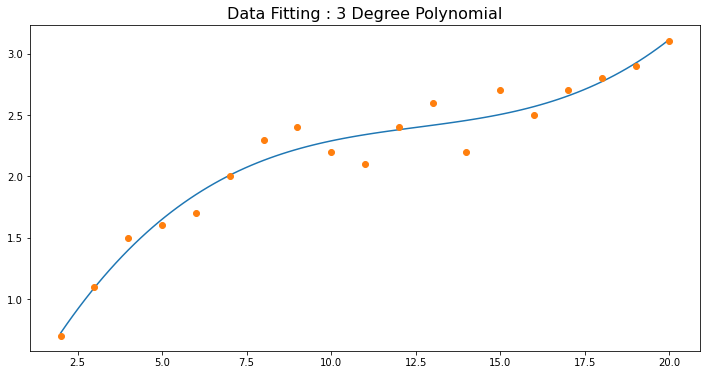

In [63]:
polynomial_coeff = np.polyfit(x,y,3)

xnew= np.linspace(2,20,100)
ynew = np.poly1d(polynomial_coeff)
fig, ax = plt.subplots(figsize = (12,6))
#Multiply x values by polynomial coefficient to get new values
ax.set_title("Data Fitting : 3 Degree Polynomial", fontsize = 16)
ax.plot(xnew,ynew(xnew),x,y,'o')
plt.show()

## References
1. “Absolute Value Function - Definition, Equation, Examples: Graphing Absolute Value Functions.” Cuemath. Accessed January 7, 2023. https://www.cuemath.com/algebra/absolute-value-function/. 
2. Absolute value function. Accessed January 7, 2023. https://www.mathsisfun.com/sets/function-absolute-value.html. 
3. Manas SharmaPh.D. researcher at Friedrich-Schiller University Jena (2015) Why can't we use absolute values of errors? (least squares method)- curve fitting, BragitOff.com. Available at: https://www.bragitoff.com/2015/09/why-cant-we-use-absolute-values-of-errors-least-squares-method-curve-fitting/ (Accessed: January 7, 2023). 
